In [15]:
import os
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.io import wavfile
import noisereduce as nr
import wave
import numpy as np
from scipy.io.wavfile import read
from sklearn.neighbors import KNeighborsClassifier


In [3]:
absolute_path = os.path.dirname(
    "E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts/")
relative_path = "pattern"

fullpath = os.path.join(absolute_path, relative_path)


In [4]:
for count, filename in enumerate(os.listdir(fullpath)):
    print(filename)


.DS_Store
AnhSon
ChiBi


In [5]:
def calc_distances(sound_file):
    # The minimun value for the sound to be recognized as a knock
    min_val = 5000

    fs, data = read(sound_file)
    data_size = len(data)

    # The number of indexes on 0.15 seconds
    focus_size = int(0.15 * fs)

    focuses = []
    distances = []
    idx = 0

    while idx < len(data):
        if data[idx] > min_val:
            mean_idx = idx + focus_size // 2
            focuses.append(float(mean_idx) / data_size)
            if len(focuses) > 1:
                last_focus = focuses[-2]
                actual_focus = focuses[-1]
                distances.append(actual_focus - last_focus)
            idx += focus_size
        else:
            idx += 1
    return distances


In [6]:
def accept_test(pattern, test, min_error):
    if len(pattern) > len(test):
        return False
    for i, dt in enumerate(pattern):
        if not dt - test[i] < min_error:
            return False
    return True


### plot wav files

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test.wav
8196


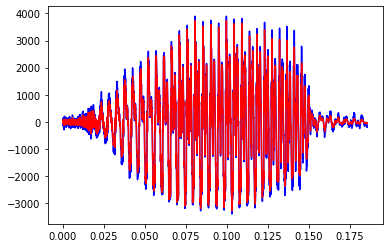

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test1.wav
7655


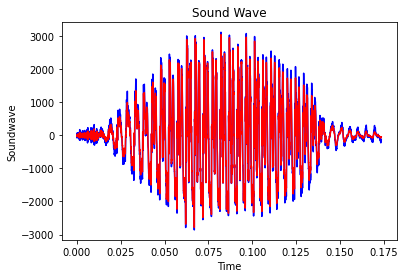

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test2.wav
7926


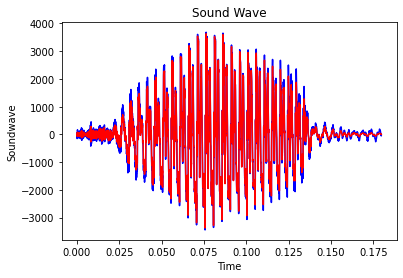

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test3.wav
7385


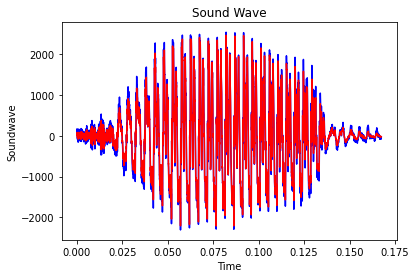

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test4.wav
7835


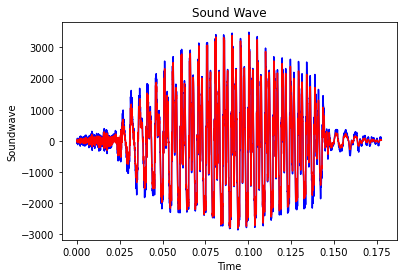

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test5.wav
7115


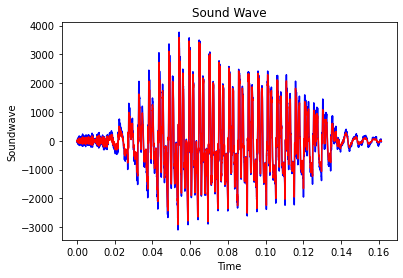

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test6.wav
7565


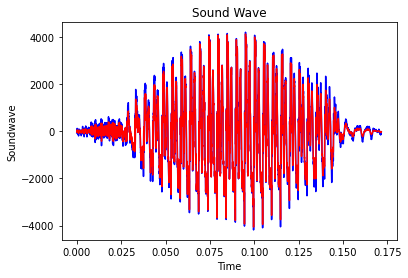

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test7.wav
8196


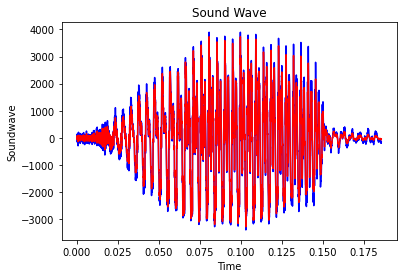

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\ChiBi\conv-wav\test0.wav
5878


KeyboardInterrupt: 

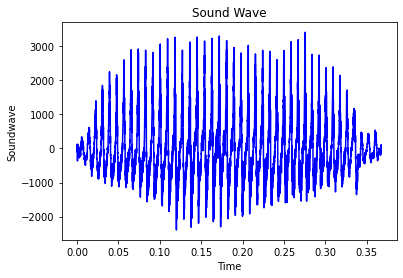

In [22]:
for count, filename in enumerate(os.listdir(fullpath)):
    if filename == "AnhSon" or filename == "ChiBi":
        subpath = os.path.join(fullpath, filename)
        for c, f in enumerate(os.listdir(subpath)):
            if f == "conv-wav":
                subsubpath = os.path.join(subpath, f)
                for c1, f1 in enumerate(os.listdir(subsubpath)):
                    audiopath = os.path.join(subsubpath, f1)

                    print(audiopath)
                    fs, data = read(audiopath)
                    input_data = read(audiopath)
                    audio = input_data[1]
                    raw = wave.open(audiopath)

                    # reads all the frames
                    # -1 indicates all or max frames
                    signal = raw.readframes(-1)
                    signal = np.frombuffer(signal, dtype="int16")

                    # gets the frame rate
                    f_rate = raw.getframerate()

                    time = np.linspace(
                        0,  # start
                        len(signal) / f_rate,
                        num=len(signal)
                    )
                    print(len(signal))

                    # using matplotlib to plot
                    # creates a new figure
                    plt.plot(time, signal, 'b')

                    # load data
                    r, d = wavfile.read(f"{audiopath}")
                    # perform noise reduction
                    reduced_noise = nr.reduce_noise(y=d, sr=r)
                    wavfile.write(
                        f"{subpath}/reduce-noise/test{c1}.wav", r, reduced_noise)

                    # do a comparison of the reduced noise files
                    adjusted_filepath = os.path.join(subpath, "reduce-noise")
                    adjusted_filepath = os.path.join(
                        adjusted_filepath, f"test{c1}.wav")
                    fs, data = read(adjusted_filepath)
                    input_data = read(adjusted_filepath)
                    audio = input_data[1]

                    raw = wave.open(adjusted_filepath)

                    # reads all the frames
                    # -1 indicates all or max frames
                    signal = raw.readframes(-1)
                    signal = np.frombuffer(signal, dtype="int16")

                    # gets the frame rate
                    f_rate = raw.getframerate()


                    # using matplotlib to plot
                    # creates a new figure
                    plt.plot(time, signal, 'r')

                    # shows the plot
                    # in new window
                    plt.show()

                    # title of the plot
                    plt.title("Sound Wave")

                    # label of x-axis
                    plt.xlabel("Time")
                    plt.ylabel("Soundwave")


### detect dataset filepath

In [43]:
dataset = os.path.join(absolute_path, 'dataset')
for count, filename in enumerate(os.listdir(dataset)):
    if filename == 'Anh Sơn':
        os.rename(f"{dataset}/Anh Sơn", f"{dataset}/Son")
    else:
        os.rename(f"{dataset}/Chị Bi", f"{dataset}/Bi")

dataset1 = os.path.join(dataset, 'Son')
dataset2 = os.path.join(dataset, 'Bi')


### Process audio files

In [ ]:
for count, filename in enumerate(os.listdir(fullpath)):
    if filename == "AnhSon":
        subpath = os.path.join(fullpath, filename)
        for c, f in enumerate(os.listdir(subpath)):
            if f == "reduce-noise":
                subsubpath = os.path.join(subpath, f)
                for c1, f1 in enumerate(os.listdir(subsubpath)):
                    if f1.endswith('wav'):
                        audiopath = os.path.join(subsubpath, f1)
                        print(audiopath)
                        fs, data = read(audiopath)
                        # we will use the size of the array
                        # to determine the duration of the sound
                        data_size = len(data)

                        # build k-nearest neighbors
                        # ...

                        pattern = calc_distances(f1)
                        test = calc_distances()  # filename to be processed

                        min_error = 0.1

                        print(accept_test(pattern, test, min_error))


In [7]:
pattern = calc_distances(f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav")
test = calc_distances(f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav")


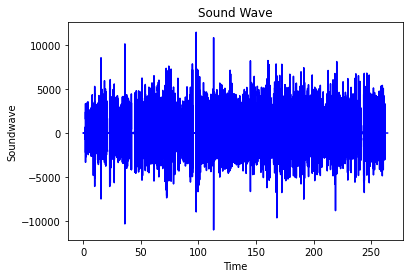

Text(0, 0.5, 'Soundwave')

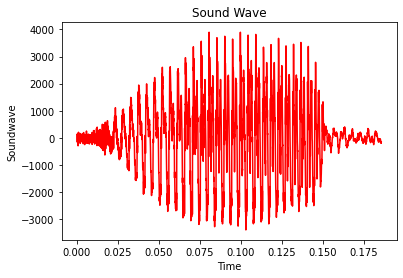

In [32]:
input_data = f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav"
input_data1 = f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav"

raw = wave.open(input_data)
raw1 = wave.open(input_data1)

signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype="int16")
signal1 = raw1.readframes(-1)
signal1 = np.frombuffer(signal1, dtype="int16")

# gets the frame rate
f_rate = raw.getframerate()
f_rate1 = raw1.getframerate()

time = np.linspace(
    0,  # start
    len(signal) / f_rate,
    num=len(signal)
)
time1 = np.linspace(
    0,  # start
    len(signal1) / f_rate1,
    num=len(signal1)
)

# using matplotlib to plot
# creates a new figure
plt.plot(time, signal, 'b')
# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")
plt.ylabel("Soundwave")


plt.show()
plt.plot(time1, signal1, 'r')

# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")
plt.ylabel("Soundwave")


In [12]:
t1 = os.path.join(absolute_path, "dataset")
t1 = os.path.join(t1, "Son")
t1 = os.path.join(t1, "KH-CN")
t1 = os.path.join(t1, "KH-CN03.wav")
print(calc_distances(t1))

[0.020813513146189587, 0.011264558828374682, 0.0032884350323438005, 0.014017505601133406, 0.0017782397340010692, 0.013094279567943942, 0.034945478183036255, 0.05628581361954027, 0.01069886837885628, 0.011894600534853333, 0.0036799480796898265, 0.0023582590634026457, 0.004232167666084585, 0.00648540547812812, 0.0014221627788211233, 0.009678429046818898, 0.003190706923440201, 0.0016908936278870468, 0.020237354892205628, 0.0010158918432122133, 0.0015418561167671596, 0.00119504574258944, 0.0015276988402359581, 0.00550434911535036, 0.0017397147815009228, 0.007421158556005836, 0.008057120578124799, 0.014504086905428704, 0.029734999807804252, 0.011316726247350473, 0.004684428300001098, 0.0017126872535775939, 0.0005692941199081369, 0.011135084099370696, 0.0006791202651203476, 0.0020195140467639816, 0.003805819138304023, 0.005611086400228449, 0.012608556280408134, 0.03332682956629657, 0.02027622305140958, 0.0024441465410255936, 0.0013061589129407802, 0.0030660370882892307, 0.010043944186353015,

In [13]:
my_set = calc_distances(t1)

my_set[0]

0.020813513146189587

In [ ]:
if accept_test(pattern, t1, min_error):
    for i, dt in enumerate(pattern):
        if dt - my_set[i] >= min_error:
            time = np.linspace(
                0,  # start
                len(signal) / f_rate,
                num=len(signal)
            )
            t1 = from_min * 60 * 1000
            t2 = to_min * 60 * 1000
            split_audio = self.audio[t1:t2]
            split_audio.export(self.folder + '\\' + split_filename, format="wav")


In [55]:
min_error = 0.1

In [56]:
print(accept_test(pattern, test, min_error))

True
